In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df=pd.read_csv('DEMs_exp_log2.csv')

df['SD'][df['SD'] == 3] = 0

df.index = df['Unnamed: 0']
df.drop('Unnamed: 0', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
df.head()

,hsa-miR-375,hsa-miR-29c*,hsa-miR-1258,hsa-miR-132*,hsa-miR-142-3p,hsa-miR-520c-3p,hsa-miR-302b,hsa-miR-204,hsa-miR-1468,hsa-miR-576-5p,hsa-miR-601,hsa-miR-609,hsa-miR-154,hsa-miR-508-3p,hsa-miR-942,hsa-miR-302d,hsa-miR-135b,hsa-miR-522,hsa-miR-488,hsa-miR-1262,hsa-miR-126*,hsa-miR-373,hsa-miR-483-3p,hsa-miR-133a,hsa-miR-190b,hsa-miR-598,hsa-miR-199b-5p,hsa-miR-1282,hsa-miR-1825,hsa-miR-130b*,hsa-miR-578,hsa-miR-520f,hsa-miR-26a-2*,hsa-miR-450a,hsa-miR-29b-1*,hsa-miR-615-3p,hsa-miR-892b,hsa-miR-1290,hsa-miR-556-3p,hsa-miR-98,...,hsa-miR-454*,hsa-miR-613,hsa-miR-302a,hsa-miR-376a*,hsa-miR-9,hsa-miR-520d-3p,hsa-miR-455-5p,hsa-miR-515-5p,hsa-miR-31*,hsa-miR-488*,hsa-miR-200a,hsa-miR-489,hsa-miR-1283,hsa-miR-566,hsa-miR-455-3p,hsa-miR-646,hsa-miR-519b-5p,hsa-miR-1245,hsa-miR-1291,hsa-miR-155*,hsa-miR-31,hsa-miR-518a-5p,hsa-miR-21*,hsa-miR-564,hsa-miR-933,hsa-miR-589,hsa-miR-545*,hsa-miR-520d-5p,hsa-miR-518d-5p,hsa-miR-96*,hsa-miR-136*,hsa-miR-491-3p,hsa-miR-568,hsa-miR-450b-5p,hsa-miR-556-5p,hsa-miR-10b*,hsa-miR-298,hsa-miR-889,hsa-miR-518d-3p,SD
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM1512142,1.000000,4.262995,4.262995,1.0,6.420548,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,4.262995,1.0,1.000000,2.336774,1.0,2.336774,1.000000,1.0,1.000000,1.000000,6.728644,5.450346,1.0,1.000000,1.000000,2.336774,6.248638,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.450346,4.262995,5.014422,1.0,4.262995,...,1.000000,1.0,1.0,1.0,4.262995,1.0,1.000000,7.828533,7.828533,7.059014,6.728644,8.273836,6.728644,7.319222,7.319222,9.504007,8.052603,6.248638,6.420548,4.262995,7.059014,8.455011,7.059014,7.828533,8.373233,6.248638,4.262995,6.420548,7.222831,6.728644,5.450346,6.420548,6.248638,5.781078,7.059014,6.038019,8.455011,1.000000,5.450346,0.0
GSM1512143,1.000000,1.000000,1.000000,1.0,4.370692,1.000000,1.0,1.0,1.0,1.0,1.391073,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.391073,1.0,1.000000,3.136886,6.436324,5.240589,1.0,3.136886,3.136886,1.000000,6.284242,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.240589,4.370692,1.391073,1.0,3.846243,...,1.000000,1.0,1.0,1.0,3.846243,1.0,1.391073,8.349497,8.656972,6.356608,6.436324,8.090505,6.170350,6.529228,7.960402,8.606451,7.835585,4.370692,7.004594,4.370692,7.336514,7.687020,4.370692,7.275976,8.201368,6.067018,5.062997,5.628266,8.431464,8.285002,6.170350,6.684122,6.836845,5.949447,7.336514,6.284242,7.150665,5.062997,5.062997,0.0
GSM1512144,1.000000,4.888494,1.000000,1.0,7.254011,1.654871,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,5.710041,1.000000,1.0,1.000000,1.000000,1.0,5.406824,1.000000,5.710041,6.701950,1.0,6.167703,1.654871,1.000000,5.824839,1.000000,4.888494,1.000000,4.050694,1.654871,1.654871,1.000000,5.580730,1.000000,1.0,7.643808,...,1.000000,1.0,1.0,1.0,1.000000,1.0,1.654871,6.768200,7.093676,5.935992,6.423491,7.036954,6.423491,5.935992,7.093676,7.575507,6.932835,5.710041,6.932835,4.470609,6.895560,7.093676,6.964425,7.332490,7.383830,6.574513,4.050694,5.935992,7.212345,7.212345,5.406824,6.340894,6.064883,5.935992,7.136268,5.853284,6.340894,4.470609,6.064883,0.0
GSM1512145,3.992913,1.000000,1.000000,1.0,6.236254,3.992913,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,2.484653,5.198381,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,6.071196,1.0,6.236254,1.000000,1.000000,1.000000,2.484653,1.000000,2.484653,1.000000,1.000000,3.992913,2.484653,1.000000,3.992913,1.0,7.413773,...,3.992913,1.0,1.0,1.0,2.484653,1.0,3.992913,7.215294,7.687020,6.071196,6.990446,7.083919,6.720574,6.071196,7.083919,7.592523,7.215294,5.576247,6.806830,5.847563,6.720574,7.215294,6.621930,6.720574,7.158045,5.847563,5.198381,6.236254,7.336514,7.476855,5.576247,6.523319,6.236254,5.847563,7.687020,6.236254,5.847563,5.198381,5.198381,0.0
GSM1512146,1.000000,3.155257,1.000000,1.0,4.745715,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,3.155257,5.822897,1.0,4.745715,1.000000,1.000000,4.745715,1.00000

In [4]:
df['SD'].value_counts()

0.0    94
1.0    62
Name: SD, dtype: int64

**NOTE:** '0' classs represents 'Healthy' and '1' class represents 'MI'.

**Question:** Should I try to make number of each class samples equal by upsampling, downsampling or any other algorithm or not?

In [5]:
corr = df.corr()
corr = corr[corr < 1]
corr[corr >= 0.8].sum().sum()

0.0

In [6]:
corr[corr <= -0.8].sum().sum()

0.0

**NOTE:** There is no couple of strongly correlated mirs.

In [ ]:
df_melt=pd.melt(df, id_vars='SD')

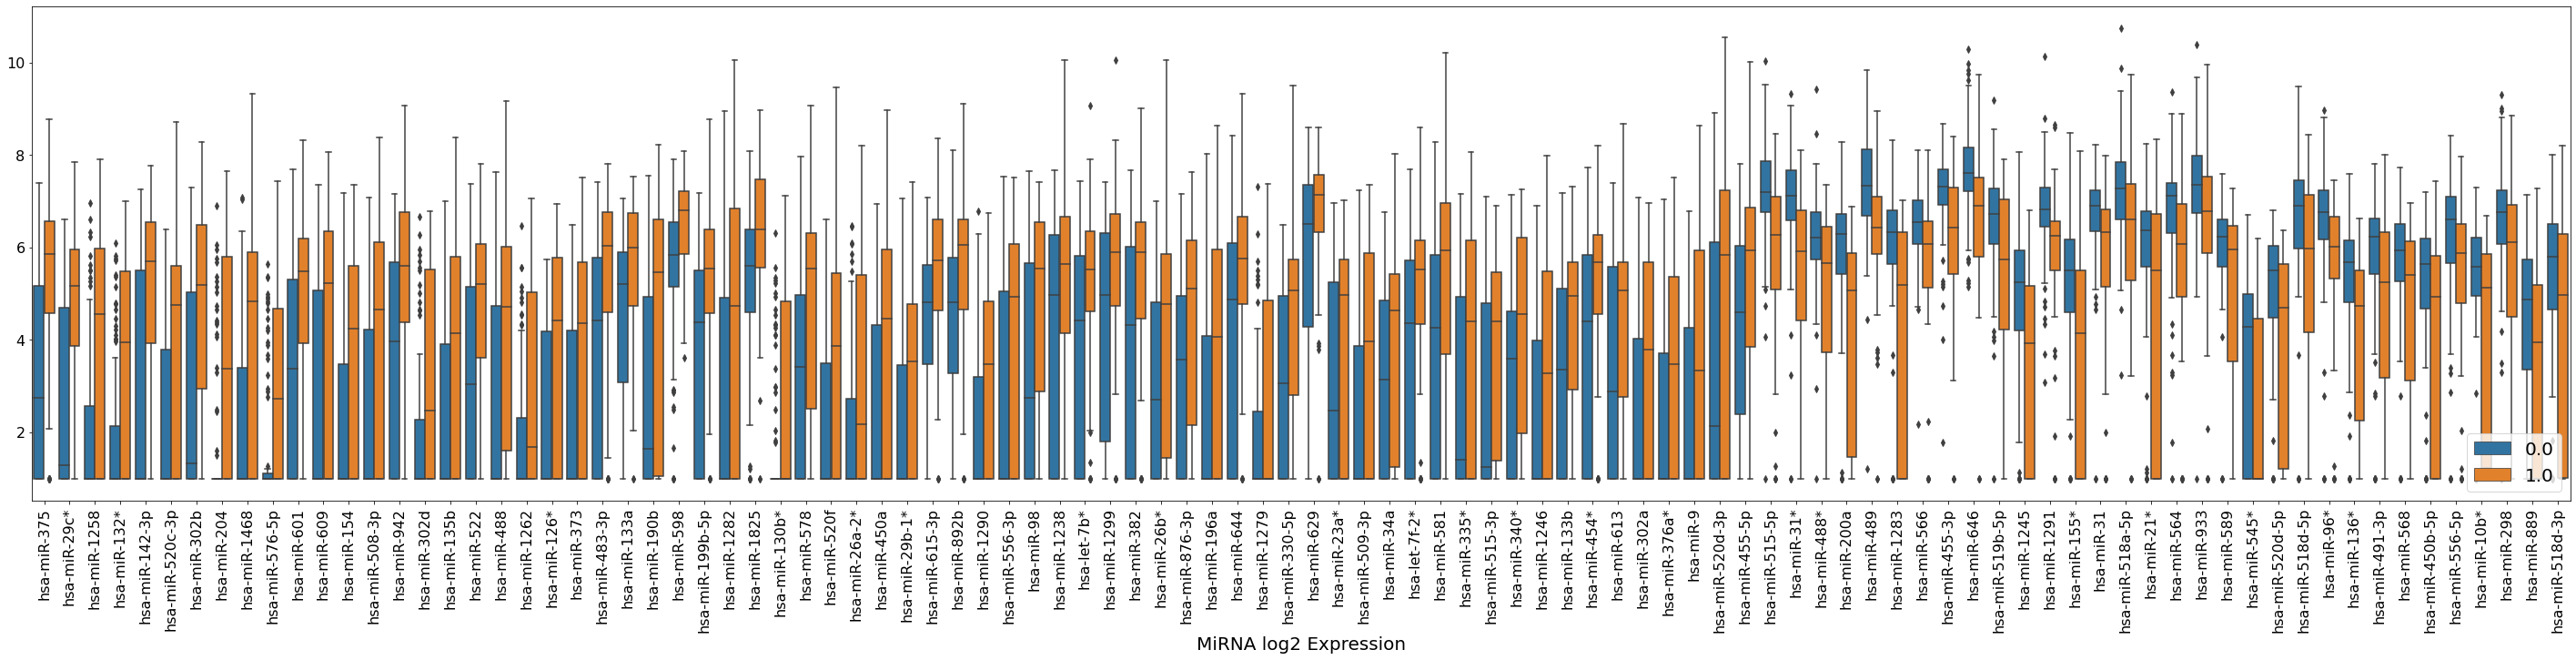

In [ ]:
plt.figure(figsize=(50,10))
sns.boxplot(x="variable", y="value", hue='SD', data=df_melt);
plt.ylabel('', fontsize = 20)
plt.xlabel('MiRNA log2 Expression', fontsize = 20)
plt.legend(loc='lower right', prop={'size':20})
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('Expression.pdf', bbox_inches='tight')

**Question:** Should I normalize the data that are all from one type of data? What about outlier detection and deletion?

In [7]:
X=df.drop('SD', axis=1)
y=df['SD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Random Forest

In [ ]:
RF=RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
print('Model score on train set:')
print(RF.score(X_train, y_train))
print('Model score on train set:')
print(RF.score(X_test, y_test))

Model score on train set:
1.0
Model score on train set:
0.723404255319149


In [ ]:
imp=RF.feature_importances_
RF.feature_names_in_[imp.argsort()[-4:][::-1]]

array(['hsa-miR-133a', 'hsa-miR-483-3p', 'hsa-miR-488*', 'hsa-miR-126*'],
      dtype=object)

## Grid Search

### All together

In [ ]:
param_grid = {
    'n_estimators' : [50, 100, 200, 300],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 6, 9, 15],
    'max_features' : [2, 3, 4, 5, 6]
}
base_estimator = RandomForestClassifier(random_state=1, n_jobs=-1)

grid_search=GridSearchCV(base_estimator, param_grid=param_grid,
                         cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, 15],
                         'max_features': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200, 300]})

In [ ]:
print('Model score on train set:')
print(grid_search.score(X_train, y_train))
print('Model score on train set:')
print(grid_search.score(X_test, y_test))

Model score on train set:
1.0
Model score on train set:
0.7659574468085106


In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 3,
 'n_estimators': 100}

In [ ]:
RF_GS_all=grid_search.best_estimator_.fit(X_train, y_train)

In [ ]:
imp=RF_GS_all.feature_importances_
RF_GS_all.feature_names_in_[imp.argsort()[-4:][::-1]]

array(['hsa-miR-489', 'hsa-miR-598', 'hsa-miR-1291', 'hsa-miR-133a'],
      dtype=object)

### Every time, I have ran the search for one parameter and add the best value for that parameter to the model




In [ ]:
param_grid = {
    #'n_estimators' : [50, 100, 200, 300]
    #'criterion' : ['gini', 'entropy']
    #'max_depth' : [3, 6, 9, 15]
    'max_features' : [2, 3, 4, 5, 6]
}
base_estimator = RandomForestClassifier(random_state=1, n_jobs=-1)

grid_search=GridSearchCV(base_estimator, param_grid=param_grid,
                         cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             n_jobs=-1, param_grid={'max_features': [2, 3, 4, 5, 6]})

In [ ]:
print('Model score on train set:')
print(grid_search.score(X_train, y_train))
print('Model score on train set:')
print(grid_search.score(X_test, y_test))

Model score on train set:
1.0
Model score on train set:
0.7872340425531915


In [ ]:
grid_search.best_params_

{'max_features': 6}

In [ ]:
RF_GS_1by1=RandomForestClassifier(n_estimators=100, max_depth=9, 
                                        max_features=6, criterion='entropy', 
                                        random_state=1, n_jobs=-1)
RF_GS_1by1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=6,
                       n_jobs=-1, random_state=1)

In [ ]:
print('Model score on train set:')
print(RF_GS_1by1.score(X_train, y_train))
print('Model score on train set:')
print(RF_GS_1by1.score(X_test, y_test))

Model score on train set:
1.0
Model score on train set:
0.7446808510638298


In [ ]:
imp=RF_GS_1by1.feature_importances_
RF_GS_1by1.feature_names_in_[imp.argsort()[-4:][::-1]]

array(['hsa-miR-133a', 'hsa-miR-483-3p', 'hsa-miR-518a-5p',
       'hsa-miR-132*'], dtype=object)

# Gradiant Boosting

In [ ]:
GB=RandomForestClassifier()
GB.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
print('Model score on train set:')
print(GB.score(X_train, y_train))
print('Model score on train set:')
print(GB.score(X_test, y_test))

Model score on train set:
1.0
Model score on train set:
0.7659574468085106


In [ ]:
imp=GB.feature_importances_
RF.feature_names_in_[imp.argsort()[-4:][::-1]]

array(['hsa-miR-133a', 'hsa-miR-483-3p', 'hsa-miR-1291', 'hsa-miR-132*'],
      dtype=object)

### All together

In [ ]:
param_grid = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate' : [0.01, 0.1, 0.5],
    'n_estimators' : [50, 100, 200, 300],
    'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'max_depth' : [3, 6, 9, 15],
    'max_features' : [2, 3, 4, 5, 6],
}
base_estimator = GradientBoostingClassifier(random_state=1)

grid_search=GridSearchCV(base_estimator, param_grid=param_grid,
                         cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 6, 9, 15],
                         'max_features': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200, 300]})

In [ ]:
print('Model score on train set:')
print(grid_search.score(X_train, y_train))
print('Model score on train set:')
print(grid_search.score(X_test, y_test))

Model score on train set:
1.0
Model score on train set:
0.7659574468085106


In [ ]:
grid_search.best_params_

{'criterion': 'mae',
 'learning_rate': 0.5,
 'loss': 'exponential',
 'max_depth': 3,
 'max_features': 5,
 'n_estimators': 300}

In [ ]:
RF_GS_all=grid_search.best_estimator_.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.

In [ ]:
imp=RF_GS_all.feature_importances_
RF_GS_all.feature_names_in_[imp.argsort()[-4:][::-1]]

array(['hsa-miR-892b', 'hsa-miR-133a', 'hsa-miR-1468', 'hsa-miR-29b-1*'],
      dtype=object)

### Every time, I have ran the search for one parameter and add the best value for that parameter to the model




In [ ]:
param_grid = {
    #'loss' : ['deviance', 'exponential']
    #'learning_rate' : [0.01, 0.1, 0.5]
    #'n_estimators' : [50, 100, 200, 300]
    #'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae']
    #'max_depth' : [3, 6, 9, 15]
    'max_features' : [2, 3, 4, 5, 6]
}
base_estimator = GradientBoostingClassifier(random_state=1)

grid_search=GridSearchCV(base_estimator, param_grid=param_grid,
                         cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1, param_grid={'max_features': [2, 3, 4, 5, 6]})

In [ ]:
print('Model score on train set:')
print(grid_search.score(X_train, y_train))
print('Model score on train set:')
print(grid_search.score(X_test, y_test))

Model score on train set:
1.0
Model score on train set:
0.7446808510638298


In [ ]:
grid_search.best_params_

{'max_features': 3}

In [ ]:
GB_GS_1by1=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_depth=3, 
                                        max_features=3, criterion='friedman_mse', random_state=1)
GB_GS_1by1.fit(X_train, y_train)

GradientBoostingClassifier(max_features=3, n_estimators=200, random_state=1)

In [ ]:
print('Model score on train set:')
print(GB_GS_1by1.score(X_train, y_train))
print('Model score on train set:')
print(GB_GS_1by1.score(X_test, y_test))

Model score on train set:
1.0
Model score on train set:
0.723404255319149


In [ ]:
imp=GB_GS_1by1.feature_importances_
GB_GS_1by1.feature_names_in_[imp.argsort()[-4:][::-1]]

array(['hsa-miR-133a', 'hsa-miR-488*', 'hsa-miR-892b', 'hsa-miR-132*'],
      dtype=object)

# An Exploration on the most important microRNAs

In [3]:
important_mirs = ['hsa-miR-133a', 'hsa-miR-488*', 'hsa-miR-892b', 'hsa-miR-132*', 'hsa-miR-598', 
 'hsa-miR-1291', 'hsa-miR-518a-5p', 'hsa-miR-483-3p', 'hsa-miR-126*', 'hsa-miR-489', 'hsa-miR-1468', 'hsa-miR-29b-1*']

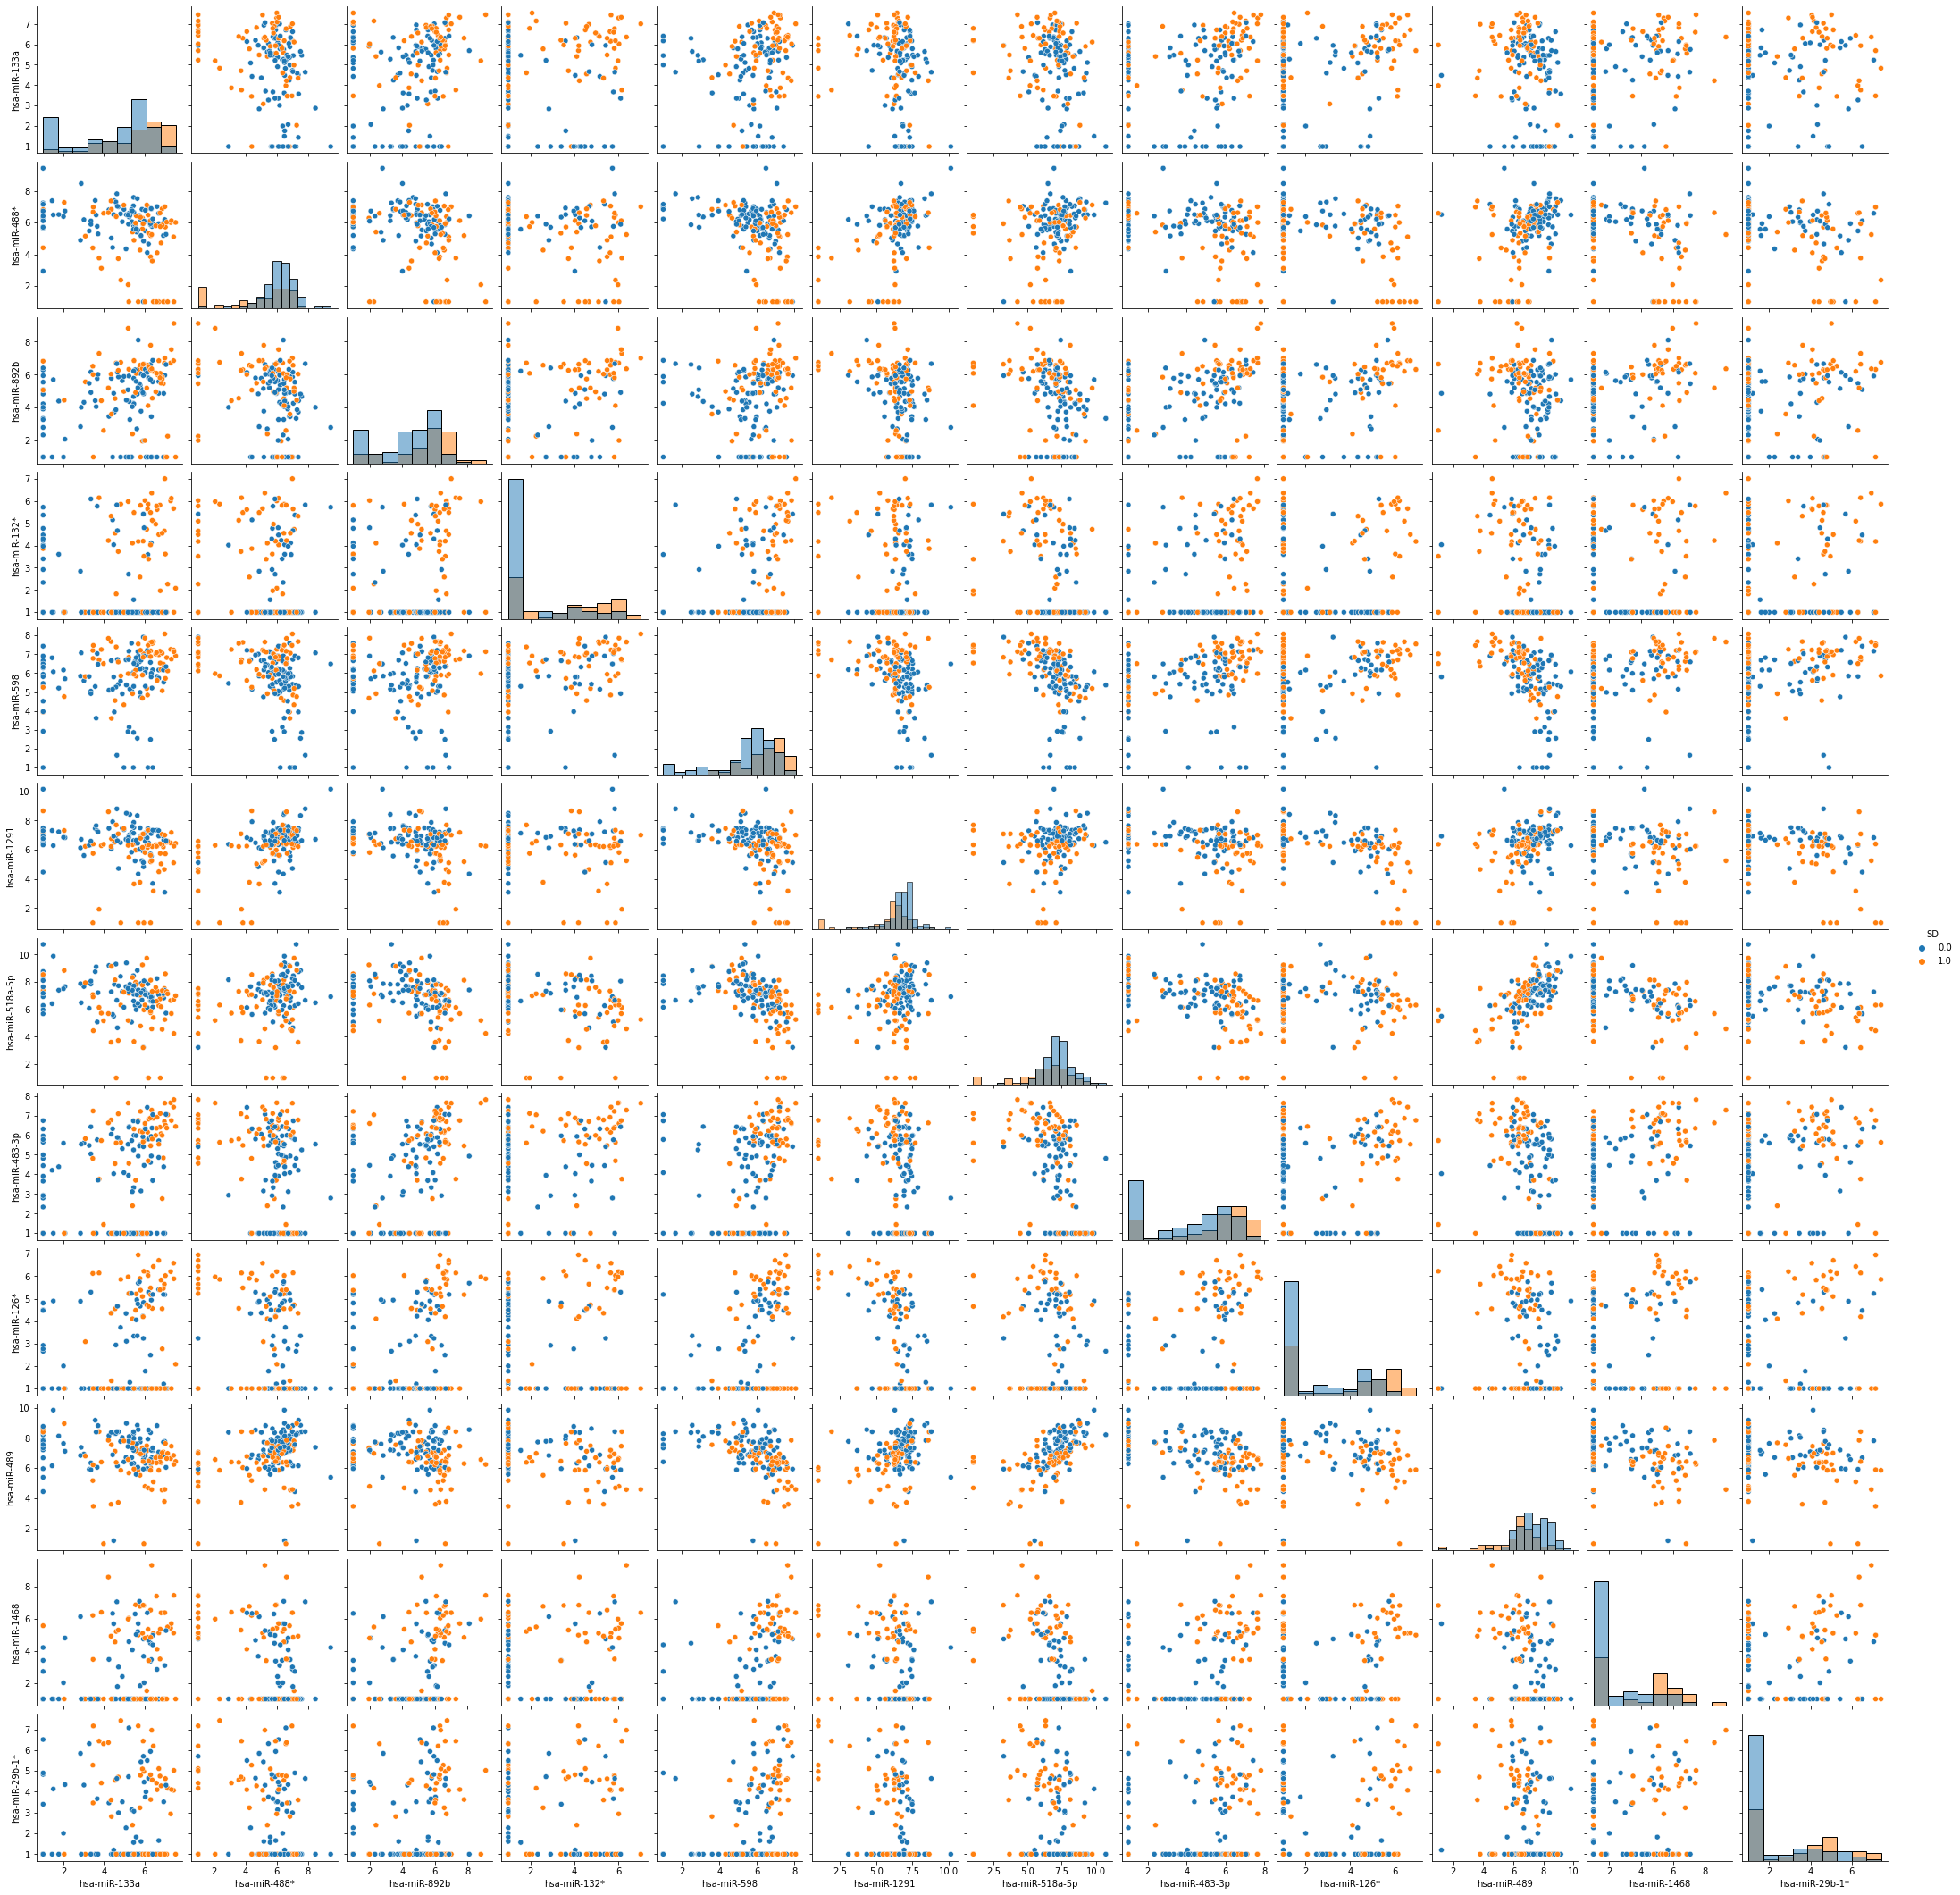

In [73]:
sns.pairplot(df, vars=important_mirs, hue='SD', diag_kind="hist", palette='tab10')
plt.savefig('pairplot_12_important_mirs.pdf')

In [33]:
X_temp=df[important_mirs]
y_temp=df['SD']
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=1)

In [34]:
RFbest=RandomForestClassifier(random_state=1)
RFbest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [35]:
print('Model score on train set:')
print(RFbest.score(X_train, y_train))
print('Model score on train set:')
print(RFbest.score(X_test, y_test))

Model score on train set:
1.0
Model score on train set:
0.7659574468085106


In [36]:
GBbest=RandomForestClassifier()
GBbest.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
print('Model score on train set:')
print(GBbest.score(X_train, y_train))
print('Model score on train set:')
print(GBbest.score(X_test, y_test))

Model score on train set:
1.0
Model score on train set:
0.7659574468085106


## At least 2 times repeated Mirs

**'hsa-miR-133a', 'hsa-miR-483-3p', 'hsa-miR-132*', 'hsa-miR-488*', 'hsa-miR-1291', 'hsa-miR-892b'**

In [106]:
X_temp=df[['hsa-miR-133a', 'hsa-miR-483-3p', 'hsa-miR-132*', 'hsa-miR-488*', 'hsa-miR-1291', 'hsa-miR-892b']]
y_temp=df['SD']
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=1)

### Random forest

In [95]:
RFbest=RandomForestClassifier(random_state=1)
RFbest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [96]:
print('Model score on train set:')
print(RFbest.score(X_train, y_train))
print('Model score on test set:')
print(RFbest.score(X_test, y_test))

Model score on train set:
1.0
Model score on test set:
0.7021276595744681


#### Grid Search

In [104]:
param_grid = {
    'n_estimators' : [50, 100, 200, 300],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 6, 9, 15],
    'max_features' : [3, 4, 5 ,6]
}

base_estimator= RandomForestClassifier(random_state=1, n_jobs=-1)
grid_search=GridSearchCV(base_estimator, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')

In [103]:
grid_search.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [102]:
print('Model score on train set:')
print(grid_search.score(X_train, y_train))
print('Model score on test set:')
print(grid_search.score(X_test, y_test))

Model score on train set:


NotFittedError: ignored

In [ ]:
grid_search.best_estimator_

In [ ]:
pred = grid_search.predict(X_test)
cm=confusion_matrix(y_test,pred,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ['Healthy','MI']],columns=[i for i in ['Predicted Healthy','Predicted MI']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True, cmap='Blues_r');

In [ ]:
print(classification_report(y_test,pred))

### Gradiant Boost

In [122]:
GBbest=RandomForestClassifier()
GBbest.fit(X_train, y_train)

RandomForestClassifier()

In [123]:
print('Model score on train set:')
print(GBbest.score(X_train, y_train))
print('Model score on train set:')
print(GBbest.score(X_test, y_test))

Model score on train set:
1.0
Model score on train set:
0.723404255319149


#### Grid Search

In [107]:
param_grid = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate' : [0.01, 0.1, 0.5],
    'n_estimators' : [50, 100, 200, 300],
    'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'max_depth' : [3, 6, 9, 15],
    'max_features' : [2, 3, 4, 5, 6],
}
base_estimator = GradientBoostingClassifier(random_state=1)
grid_search=GridSearchCV(base_estimator, param_grid=param_grid, cv=10, n_jobs=-1)

In [108]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 6, 9, 15],
                         'max_features': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200, 300]})

In [109]:
print('Model score on train set:')
print(grid_search.score(X_train, y_train))
print('Model score on train set:')
print(grid_search.score(X_test, y_test))

Model score on train set:
1.0
Model score on train set:
0.723404255319149


In [111]:
grid_search.best_estimator_

GradientBoostingClassifier(criterion='mae', max_depth=9, max_features=3,
                           n_estimators=300, random_state=1)

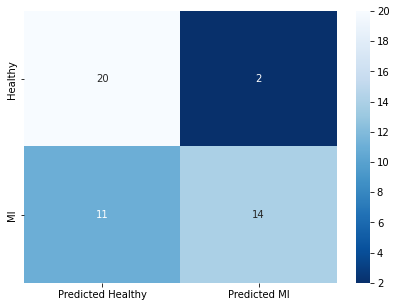

In [112]:
pred = grid_search.predict(X_test)
cm=confusion_matrix(y_test,pred,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ['Healthy','MI']],columns=[i for i in ['Predicted Healthy','Predicted MI']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True, cmap='Blues_r');

In [113]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.65      0.91      0.75        22
         1.0       0.88      0.56      0.68        25

    accuracy                           0.72        47
   macro avg       0.76      0.73      0.72        47
weighted avg       0.77      0.72      0.72        47

